### Cointegration Testing

#### Step 1: Import relevant Python packages and data sets

In [1]:
import seaborn
import warnings
import numpy as np
import pandas as pd
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import statsmodels.tsa.stattools as ts
from sklearn import linear_model

In [4]:
df = pd.read_excel('data.xlsx', index_col='Dates')
df['GTII10'] = df['GTII10']*-1
df['GOLDS'] = df['GOLDS']
df.tail()

,GTII10,GOLDS
Dates,,
2019-01-30,-0.850,1319.97
2019-01-31,-0.767,1321.20
2019-02-01,-0.814,1317.65
2019-02-04,-0.852,1312.25
2019-02-05,-0.859,1314.36


In [5]:
date_1, date_2 = '2016-01-01', '2017-01-01'
df_filtered = df.loc[date_1:date_2]

In [6]:
print(df_filtered.shape)
print(df_filtered.head())

(261, 2)
            GTII10    GOLDS
Dates                      
2016-01-01  -0.710  1061.41
2016-01-04  -0.674  1074.56
2016-01-05  -0.662  1077.67
2016-01-06  -0.623  1093.67
2016-01-07  -0.635  1109.00


#### Step 2: Plot the two series

Start Date: 2016-01-01 End Date: 2017-01-01 P-Value: 0.0184


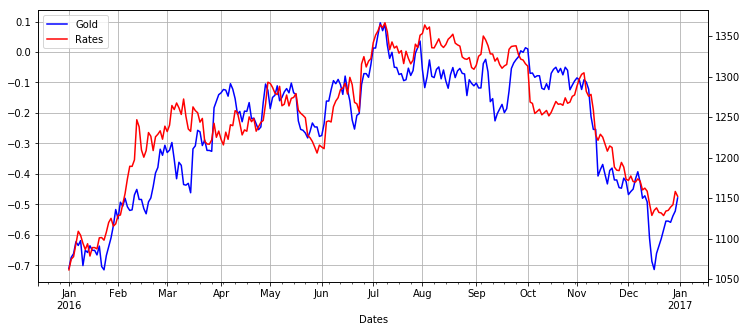

In [7]:
_pval = ts.coint(df_filtered['GTII10'], df_filtered['GOLDS'])[1]
handle = 'Start Date: ' + str(date_1) + ' End Date: ' + str(date_2) + ' P-Value: ' + "{0:.4f}".format(round(_pval,4))

print(handle)
plt.figure(figsize=(12,5))

ax1 = df_filtered.GTII10.plot(color='blue', grid=True, label='Gold')
ax2 = df_filtered.GOLDS.plot(color='red', grid=True, secondary_y=True, label='Rates')

h1, l1 = ax1.get_legend_handles_labels()
h2, l2 = ax2.get_legend_handles_labels()


plt.legend(h1+h2, l1+l2, loc=2)
plt.savefig(date_1 + ' - ' + date_2 + ' - ' + 'P-Value ' + "{0:.4f}".format(round(_pval,4)) + '.jpg')
plt.show()

In [148]:
print('Rates regressed against Gold: ', ts.coint(df_filtered['GTII10'], df_filtered['GOLDS'])[1])
print('Gold regressed against Rates: ', ts.coint(df_filtered['GOLDS'], df_filtered['GTII10'])[1])

Rates regressed against Gold:  0.259259768382
Gold regressed against Rates:  0.525428282173


#### Calculate the coefficients for the past 60 days for the entire series

In [136]:
coefficients = []
dates = []
_pvals = []
for i in range(60, len(df.index)):
    X = df['GTII10'].loc[df.index[i] - timedelta(days=60):df.index[i]]
    Y = df['GOLDS'].loc[df.index[i] - timedelta(days=60):df.index[i]]
    #print(X)
    #print(Y)
    _pvals.append(ts.coint(X, Y)[1])
    regr = LinearRegression()
    regr.fit(X.values.reshape(-1,1), Y.values.reshape(-1,1))
    print(df.index[i], regr.coef_[0][0])
    coefficients.append(regr.coef_[0][0])
    dates.append(df.index[i])

1997-04-24 00:00:00 -0.330323106092
1997-04-25 00:00:00 -0.336751899149
1997-04-28 00:00:00 -0.395915102748
1997-04-29 00:00:00 -0.394201170313
1997-04-30 00:00:00 -0.370587459802
1997-05-01 00:00:00 -0.37759509964
1997-05-02 00:00:00 -0.382770576532
1997-05-05 00:00:00 -0.331869034855
1997-05-06 00:00:00 -0.338402288961
1997-05-07 00:00:00 -0.377414080558
1997-05-08 00:00:00 -0.379081535557
1997-05-09 00:00:00 -0.378155096669
1997-05-12 00:00:00 -0.426463811956
1997-05-13 00:00:00 -0.409318937926
1997-05-14 00:00:00 -0.41012201729
1997-05-15 00:00:00 -0.410913639026
1997-05-16 00:00:00 -0.411218602497
1997-05-19 00:00:00 -0.443689651221
1997-05-20 00:00:00 -0.413769550987
1997-05-21 00:00:00 -0.356107247162
1997-05-22 00:00:00 -0.355980190982
1997-05-23 00:00:00 -0.358915067053
1997-05-26 00:00:00 -0.298241824086
1997-05-27 00:00:00 -0.275493897382
1997-05-28 00:00:00 -0.249609107943
1997-05-29 00:00:00 -0.249228049087
1997-05-30 00:00:00 -0.245787050215
1997-06-02 00:00:00 -0.0878968

1998-03-25 00:00:00 -0.793722925243
1998-03-26 00:00:00 -0.616071064043
1998-03-27 00:00:00 -0.420179003591
1998-03-30 00:00:00 -0.220452205665
1998-03-31 00:00:00 -0.155588750209
1998-04-01 00:00:00 -0.0441839967848
1998-04-02 00:00:00 0.0235917273855
1998-04-03 00:00:00 0.0781015539309
1998-04-06 00:00:00 0.237626756378
1998-04-07 00:00:00 0.407771411225
1998-04-08 00:00:00 0.599781794247
1998-04-09 00:00:00 0.704030460814
1998-04-10 00:00:00 0.778664537356
1998-04-13 00:00:00 1.00436340244
1998-04-14 00:00:00 1.08628451865
1998-04-15 00:00:00 1.16313467057
1998-04-16 00:00:00 1.19973821109
1998-04-17 00:00:00 1.22611655807
1998-04-20 00:00:00 1.41961703995
1998-04-21 00:00:00 1.53862976705
1998-04-22 00:00:00 1.64456616741
1998-04-23 00:00:00 1.6626756283
1998-04-24 00:00:00 1.67805020831
1998-04-27 00:00:00 1.70272210759
1998-04-28 00:00:00 1.7494843507
1998-04-29 00:00:00 1.6045505092
1998-04-30 00:00:00 1.6093742789
1998-05-01 00:00:00 1.59622012778
1998-05-04 00:00:00 1.61949395

1999-03-01 00:00:00 0.109277726451
1999-03-02 00:00:00 0.0943727594686
1999-03-03 00:00:00 0.0760114052514
1999-03-04 00:00:00 0.0772498462439
1999-03-05 00:00:00 0.0819451512054
1999-03-08 00:00:00 0.15494247005
1999-03-09 00:00:00 0.198512882525
1999-03-10 00:00:00 0.227913744664
1999-03-11 00:00:00 0.286014342796
1999-03-12 00:00:00 0.312681479231
1999-03-15 00:00:00 0.296550419814
1999-03-16 00:00:00 0.242385737154
1999-03-17 00:00:00 0.203903999541
1999-03-18 00:00:00 0.148858003537
1999-03-19 00:00:00 0.115324467695
1999-03-22 00:00:00 0.0849719731133
1999-03-23 00:00:00 0.0626542439666
1999-03-24 00:00:00 0.0421244565838
1999-03-25 00:00:00 0.0190064217289
1999-03-26 00:00:00 -0.0210044918733
1999-03-29 00:00:00 -0.0892385924716
1999-03-30 00:00:00 -0.171710165777
1999-03-31 00:00:00 -0.232296823846
1999-04-01 00:00:00 -0.260590302863
1999-04-02 00:00:00 -0.289647165599
1999-04-05 00:00:00 -0.340535334172
1999-04-06 00:00:00 -0.363290463217
1999-04-07 00:00:00 -0.387975108949
19

2000-03-17 00:00:00 0.246195319716
2000-03-20 00:00:00 0.559692213509
2000-03-21 00:00:00 0.690708078272
2000-03-22 00:00:00 0.782238930603
2000-03-23 00:00:00 0.743097842746
2000-03-24 00:00:00 0.746253247439
2000-03-27 00:00:00 1.02604850742
2000-03-28 00:00:00 1.10859165105
2000-03-29 00:00:00 1.23857327917
2000-03-30 00:00:00 1.21029967299
2000-03-31 00:00:00 1.15920091317
2000-04-03 00:00:00 1.27244517753
2000-04-04 00:00:00 1.19964912742
2000-04-05 00:00:00 1.12732636548
2000-04-06 00:00:00 1.10433046634
2000-04-07 00:00:00 1.08571317554
2000-04-10 00:00:00 1.0253183389
2000-04-11 00:00:00 0.952584185107
2000-04-12 00:00:00 0.903491634001
2000-04-13 00:00:00 0.900650793581
2000-04-14 00:00:00 0.887605783086
2000-04-17 00:00:00 0.801552475903
2000-04-18 00:00:00 0.770129519563
2000-04-19 00:00:00 0.720444114402
2000-04-20 00:00:00 0.716164934483
2000-04-21 00:00:00 0.71239955863
2000-04-24 00:00:00 0.579379593221
2000-04-25 00:00:00 0.553575332589
2000-04-26 00:00:00 0.56118463599

2001-02-13 00:00:00 0.407706949072
2001-02-14 00:00:00 0.433760348264
2001-02-15 00:00:00 0.45566213267
2001-02-16 00:00:00 0.46749160591
2001-02-19 00:00:00 0.514238263694
2001-02-20 00:00:00 0.521398095705
2001-02-21 00:00:00 0.516913570733
2001-02-22 00:00:00 0.524218728414
2001-02-23 00:00:00 0.516238145493
2001-02-26 00:00:00 0.409003037309
2001-02-27 00:00:00 0.340078823273
2001-02-28 00:00:00 0.262049006179
2001-03-01 00:00:00 0.225844407
2001-03-02 00:00:00 0.218791412442
2001-03-05 00:00:00 0.109099474454
2001-03-06 00:00:00 0.103407585508
2001-03-07 00:00:00 0.0966431078295
2001-03-08 00:00:00 0.0630831223775
2001-03-09 00:00:00 0.00738332431858
2001-03-12 00:00:00 -0.0548926684162
2001-03-13 00:00:00 -0.0753159127928
2001-03-14 00:00:00 -0.0768973373497
2001-03-15 00:00:00 -0.0560990162117
2001-03-16 00:00:00 -0.0237079111525
2001-03-19 00:00:00 -0.0115211925158
2001-03-20 00:00:00 -0.00786305643892
2001-03-21 00:00:00 -0.010739010215
2001-03-22 00:00:00 0.000389253512943
20

2002-01-01 00:00:00 -0.0427185225788
2002-01-02 00:00:00 -0.0342746622024
2002-01-03 00:00:00 -0.0322649095474
2002-01-04 00:00:00 -0.0296752606729
2002-01-07 00:00:00 0.00187550769272
2002-01-08 00:00:00 0.00718580884954
2002-01-09 00:00:00 0.0197583103393
2002-01-10 00:00:00 0.013789129997
2002-01-11 00:00:00 0.000978253562195
2002-01-14 00:00:00 0.0254696061908
2002-01-15 00:00:00 -0.0180577473547
2002-01-16 00:00:00 -0.0641673126424
2002-01-17 00:00:00 -0.0769771677867
2002-01-18 00:00:00 -0.0912580248998
2002-01-21 00:00:00 -0.22943035191
2002-01-22 00:00:00 -0.270954175426
2002-01-23 00:00:00 -0.306629833156
2002-01-24 00:00:00 -0.305565979885
2002-01-25 00:00:00 -0.305971463032
2002-01-28 00:00:00 -0.349578378336
2002-01-29 00:00:00 -0.379959693735
2002-01-30 00:00:00 -0.410758979213
2002-01-31 00:00:00 -0.414559117165
2002-02-01 00:00:00 -0.430358287486
2002-02-04 00:00:00 -0.528825317439
2002-02-05 00:00:00 -0.587129409305
2002-02-06 00:00:00 -0.637212458982
2002-02-07 00:00:0

2003-01-14 00:00:00 -0.839955840154
2003-01-15 00:00:00 -0.839032710721
2003-01-16 00:00:00 -0.856061116965
2003-01-17 00:00:00 -0.839369020865
2003-01-20 00:00:00 -0.803007989024
2003-01-21 00:00:00 -0.773157604087
2003-01-22 00:00:00 -0.76667270883
2003-01-23 00:00:00 -0.758204316626
2003-01-24 00:00:00 -0.74543716042
2003-01-27 00:00:00 -0.698752450198
2003-01-28 00:00:00 -0.680826797524
2003-01-29 00:00:00 -0.668132027626
2003-01-30 00:00:00 -0.674947283304
2003-01-31 00:00:00 -0.67805932903
2003-02-03 00:00:00 -0.645190780596
2003-02-04 00:00:00 -0.651880206395
2003-02-05 00:00:00 -0.639812042312
2003-02-06 00:00:00 -0.621649726719
2003-02-07 00:00:00 -0.600886651405
2003-02-10 00:00:00 -0.500030294287
2003-02-11 00:00:00 -0.458412252079
2003-02-12 00:00:00 -0.394226945674
2003-02-13 00:00:00 -0.357090892901
2003-02-14 00:00:00 -0.321510305534
2003-02-17 00:00:00 -0.24373009951
2003-02-18 00:00:00 -0.203533662926
2003-02-19 00:00:00 -0.163201142071
2003-02-20 00:00:00 -0.131997835

2004-02-06 00:00:00 0.205660901481
2004-02-09 00:00:00 0.219879055065
2004-02-10 00:00:00 0.217555037188
2004-02-11 00:00:00 0.198478220269
2004-02-12 00:00:00 0.185489373387
2004-02-13 00:00:00 0.17203674199
2004-02-16 00:00:00 0.176877701911
2004-02-17 00:00:00 0.16039432685
2004-02-18 00:00:00 0.158421922377
2004-02-19 00:00:00 0.154124554758
2004-02-20 00:00:00 0.166738297998
2004-02-23 00:00:00 0.201480679976
2004-02-24 00:00:00 0.207175586835
2004-02-25 00:00:00 0.226067518682
2004-02-26 00:00:00 0.241975297623
2004-02-27 00:00:00 0.240917229399
2004-03-01 00:00:00 0.219696159381
2004-03-02 00:00:00 0.228113368284
2004-03-03 00:00:00 0.241352756141
2004-03-04 00:00:00 0.247026730178
2004-03-05 00:00:00 0.211696836262
2004-03-08 00:00:00 0.157498659573
2004-03-09 00:00:00 0.121140424633
2004-03-10 00:00:00 0.102894763005
2004-03-11 00:00:00 0.0965003378294
2004-03-12 00:00:00 0.101010038239
2004-03-15 00:00:00 0.0721772424393
2004-03-16 00:00:00 0.0641103013117
2004-03-17 00:00:00

2005-03-17 00:00:00 0.271204112349
2005-03-18 00:00:00 0.278042395763
2005-03-21 00:00:00 0.284125120181
2005-03-22 00:00:00 0.251757821123
2005-03-23 00:00:00 0.211600749591
2005-03-24 00:00:00 0.179019477641
2005-03-25 00:00:00 0.153684504586
2005-03-28 00:00:00 0.135731657938
2005-03-29 00:00:00 0.120827051959
2005-03-30 00:00:00 0.111836668733
2005-03-31 00:00:00 0.110356099494
2005-04-01 00:00:00 0.108809033909
2005-04-04 00:00:00 0.0996653461047
2005-04-05 00:00:00 0.0970793254577
2005-04-06 00:00:00 0.0884242012826
2005-04-07 00:00:00 0.082979606491
2005-04-08 00:00:00 0.079844948966
2005-04-11 00:00:00 0.00808799756722
2005-04-12 00:00:00 -0.0148738689381
2005-04-13 00:00:00 -0.0365226263758
2005-04-14 00:00:00 -0.0309632223719
2005-04-15 00:00:00 -0.0236192902931
2005-04-18 00:00:00 -0.0591661716876
2005-04-19 00:00:00 -0.0686450232454
2005-04-20 00:00:00 -0.0731906788584
2005-04-21 00:00:00 -0.0718602609987
2005-04-22 00:00:00 -0.0719807408391
2005-04-25 00:00:00 -0.073660103

2006-02-22 00:00:00 -0.521243175975
2006-02-23 00:00:00 -0.521347732724
2006-02-24 00:00:00 -0.527205260321
2006-02-27 00:00:00 -0.35960088803
2006-02-28 00:00:00 -0.319454636113
2006-03-01 00:00:00 -0.279250549385
2006-03-02 00:00:00 -0.277513160144
2006-03-03 00:00:00 -0.25779607487
2006-03-06 00:00:00 -0.197606516223
2006-03-07 00:00:00 -0.17284539368
2006-03-08 00:00:00 -0.187337637013
2006-03-09 00:00:00 -0.193020962939
2006-03-10 00:00:00 -0.209590851694
2006-03-13 00:00:00 -0.203595497557
2006-03-14 00:00:00 -0.2065603936
2006-03-15 00:00:00 -0.202144531562
2006-03-16 00:00:00 -0.199667726927
2006-03-17 00:00:00 -0.195567533359
2006-03-20 00:00:00 -0.239899102522
2006-03-21 00:00:00 -0.234078373113
2006-03-22 00:00:00 -0.254940055627
2006-03-23 00:00:00 -0.247376603777
2006-03-24 00:00:00 -0.232458707478
2006-03-27 00:00:00 -0.214501739094
2006-03-28 00:00:00 -0.171217680639
2006-03-29 00:00:00 -0.115185354683
2006-03-30 00:00:00 -0.0349561037567
2006-03-31 00:00:00 0.0150895341

2007-01-12 00:00:00 -0.213943417056
2007-01-15 00:00:00 -0.198241036087
2007-01-16 00:00:00 -0.187052189903
2007-01-17 00:00:00 -0.169129156658
2007-01-18 00:00:00 -0.161987489119
2007-01-19 00:00:00 -0.148599602751
2007-01-22 00:00:00 -0.140624864267
2007-01-23 00:00:00 -0.123791337911
2007-01-24 00:00:00 -0.107311655607
2007-01-25 00:00:00 -0.0898370022563
2007-01-26 00:00:00 -0.0744898060143
2007-01-29 00:00:00 -0.0456014858006
2007-01-30 00:00:00 -0.014810614808
2007-01-31 00:00:00 0.0156829334058
2007-02-01 00:00:00 0.0277026645763
2007-02-02 00:00:00 0.0343984327901
2007-02-05 00:00:00 0.132339713797
2007-02-06 00:00:00 0.167015142175
2007-02-07 00:00:00 0.1731443069
2007-02-08 00:00:00 0.174415423197
2007-02-09 00:00:00 0.187623791613
2007-02-12 00:00:00 0.332143060224
2007-02-13 00:00:00 0.395817451978
2007-02-14 00:00:00 0.351171667178
2007-02-15 00:00:00 0.325429246545
2007-02-16 00:00:00 0.268145837692
2007-02-19 00:00:00 0.0745449824614
2007-02-20 00:00:00 -0.0630314164875


2008-01-30 00:00:00 -0.36151060591
2008-01-31 00:00:00 -0.363511581034
2008-02-01 00:00:00 -0.361540804068
2008-02-04 00:00:00 -0.361339197273
2008-02-05 00:00:00 -0.351349470869
2008-02-06 00:00:00 -0.345828349337
2008-02-07 00:00:00 -0.348566055109
2008-02-08 00:00:00 -0.351095332293
2008-02-11 00:00:00 -0.345176685915
2008-02-12 00:00:00 -0.340141245182
2008-02-13 00:00:00 -0.33664742009
2008-02-14 00:00:00 -0.33664713037
2008-02-15 00:00:00 -0.337483618357
2008-02-18 00:00:00 -0.309001276955
2008-02-19 00:00:00 -0.290348041345
2008-02-20 00:00:00 -0.27772013027
2008-02-21 00:00:00 -0.281852184653
2008-02-22 00:00:00 -0.283872904041
2008-02-25 00:00:00 -0.237562440367
2008-02-26 00:00:00 -0.221909590778
2008-02-27 00:00:00 -0.210186813086
2008-02-28 00:00:00 -0.232079523088
2008-02-29 00:00:00 -0.23896622349
2008-03-03 00:00:00 -0.202867347442
2008-03-04 00:00:00 -0.200623109653
2008-03-05 00:00:00 -0.208380990777
2008-03-06 00:00:00 -0.213576719099
2008-03-07 00:00:00 -0.2061684102

2009-01-21 00:00:00 -0.0955236452663
2009-01-22 00:00:00 -0.0974257545639
2009-01-23 00:00:00 -0.105746680654
2009-01-26 00:00:00 -0.142775988386
2009-01-27 00:00:00 -0.163481874192
2009-01-28 00:00:00 -0.17913567143
2009-01-29 00:00:00 -0.191580285933
2009-01-30 00:00:00 -0.210970062919
2009-02-02 00:00:00 -0.182385540052
2009-02-03 00:00:00 -0.191002736675
2009-02-04 00:00:00 -0.174759648067
2009-02-05 00:00:00 -0.18294212376
2009-02-06 00:00:00 -0.190721265561
2009-02-09 00:00:00 -0.113089748386
2009-02-10 00:00:00 -0.114427803182
2009-02-11 00:00:00 -0.123714211991
2009-02-12 00:00:00 -0.149897775734
2009-02-13 00:00:00 -0.167843523886
2009-02-16 00:00:00 -0.188203943478
2009-02-17 00:00:00 -0.220853168503
2009-02-18 00:00:00 -0.242357506865
2009-02-19 00:00:00 -0.257223617899
2009-02-20 00:00:00 -0.27941735433
2009-02-23 00:00:00 -0.283341264564
2009-02-24 00:00:00 -0.278216394808
2009-02-25 00:00:00 -0.263798582215
2009-02-26 00:00:00 -0.240930166063
2009-02-27 00:00:00 -0.218834

2010-02-04 00:00:00 0.01748422635
2010-02-05 00:00:00 0.0280857314302
2010-02-08 00:00:00 0.0877002062698
2010-02-09 00:00:00 0.0764576048918
2010-02-10 00:00:00 0.0534656079263
2010-02-11 00:00:00 0.041652855836
2010-02-12 00:00:00 0.0307277570366
2010-02-15 00:00:00 0.0509245800894
2010-02-16 00:00:00 0.0557756293555
2010-02-17 00:00:00 0.0664901573004
2010-02-18 00:00:00 0.0650076754357
2010-02-19 00:00:00 0.0712930976461
2010-02-22 00:00:00 0.0762893244553
2010-02-23 00:00:00 0.0726034027129
2010-02-24 00:00:00 0.0635717838696
2010-02-25 00:00:00 0.0610950296355
2010-02-26 00:00:00 0.0640162468508
2010-03-01 00:00:00 0.0709160575359
2010-03-02 00:00:00 0.0819168165191
2010-03-03 00:00:00 0.0950801704237
2010-03-04 00:00:00 0.0995127122034
2010-03-05 00:00:00 0.106397729513
2010-03-08 00:00:00 0.102548427033
2010-03-09 00:00:00 0.104889408865
2010-03-10 00:00:00 0.102578677298
2010-03-11 00:00:00 0.100134269505
2010-03-12 00:00:00 0.0981798371431
2010-03-15 00:00:00 0.107765481393
2

2011-01-31 00:00:00 -0.0743959397932
2011-02-01 00:00:00 -0.0850268263356
2011-02-02 00:00:00 -0.0868209907418
2011-02-03 00:00:00 -0.0862583638733
2011-02-04 00:00:00 -0.0856844734407
2011-02-07 00:00:00 -0.0760674573123
2011-02-08 00:00:00 -0.065991405584
2011-02-09 00:00:00 -0.0633868977817
2011-02-10 00:00:00 -0.0578351234822
2011-02-11 00:00:00 -0.0564250746787
2011-02-14 00:00:00 -0.0610420905571
2011-02-15 00:00:00 -0.0561404898986
2011-02-16 00:00:00 -0.0506430901774
2011-02-17 00:00:00 -0.0464257786478
2011-02-18 00:00:00 -0.0432892415735
2011-02-21 00:00:00 -0.0355554492204
2011-02-22 00:00:00 -0.0350648737154
2011-02-23 00:00:00 -0.0354889211462
2011-02-24 00:00:00 -0.0373025246683
2011-02-25 00:00:00 -0.0404077208249
2011-02-28 00:00:00 -0.0413271037926
2011-03-01 00:00:00 -0.0459942849205
2011-03-02 00:00:00 -0.0461232900147
2011-03-03 00:00:00 -0.0478358773326
2011-03-04 00:00:00 -0.0526226157976
2011-03-07 00:00:00 -0.0549134304172
2011-03-08 00:00:00 -0.0614461161382
20

/Users/zacharyescalante/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/stattools.py:1018: UserWarning: y0 and y1 are perfectly colinear.  Cointegration test is not reliable in this case.
  warnings.warn("y0 and y1 are perfectly colinear.  Cointegration test "


ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [ ]:
df_coef = pd.DataFrame({'coefficients':coefficients, 'pvalues': _pvals}, index=dates)
df_coef.head()

In [ ]:
plt.figure(figsize=(18,10))

ax_coef = df_coef.coefficients.plot(color='blue', grid=True, label='coefficients')
ax_pval = df_coef.pvalues.plot(color='red', grid=True, secondary_y=True, label='p_values')

h1, l1 = ax_coef.get_legend_handles_labels()
h2, l2 = ax_pval.get_legend_handles_labels()


plt.legend(h1+h2, l1+l2, loc=2)
plt.show()

#### Step 3: Print the Z-Score series graph for each pair of co-integrated pairs

In [157]:
def zscore(series):
    return (series - series.mean()) / np.std(series)

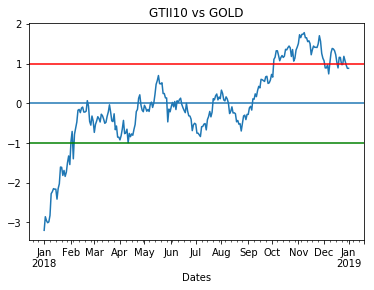

In [158]:
header = str('GTII10 vs GOLD')
S1 = df_filtered['GTII10']
S2 = df_filtered['GOLDS']
ratios = S1/S2
z_score = zscore(ratios)
z_score.plot()
plt.axhline(zscore(ratios).mean())
plt.axhline(1.0, color='red')
plt.axhline(-1.0, color='green')
plt.title(header)
plt.show()

#### Step 4: Feature Engineering for Cointegration

Let’s start using the following features:

* Split our data into train/test split
* 60 day Moving Average of Ratio: Measure of rolling mean
* 5 day Moving Average of Ratio: Measure of current value of mean
* 60 day Standard Deviation
* z score: (5d MA — 60d MA) /60d SD

##### Plot the features

In [23]:
ratios = df_filtered['GOLDS'] / df_filtered['GTII10']
length = len(ratios)

train = ratios[:round(0.7*length)]
test = ratios[round(0.7*length):]

In [24]:
ratios_mavg5 = train.rolling(window=5, center=False).mean()
ratios_mavg60 = train.rolling(window=60, center=False).mean()
std_60 = train.rolling(window=60, center=False).std()
zscore_60_5 = (ratios_mavg5 - ratios_mavg60)/std_60

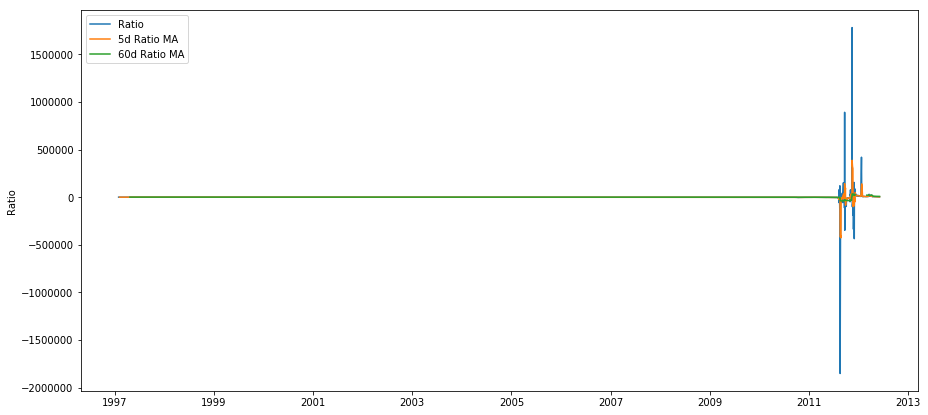

In [25]:
plt.figure(figsize=(15,7))
plt.plot(train.index, train.values)
plt.plot(ratios_mavg5.index, ratios_mavg5.values)
plt.plot(ratios_mavg60.index, ratios_mavg60.values)
plt.legend(['Ratio','5d Ratio MA', '60d Ratio MA'])
plt.ylabel('Ratio')
plt.show()

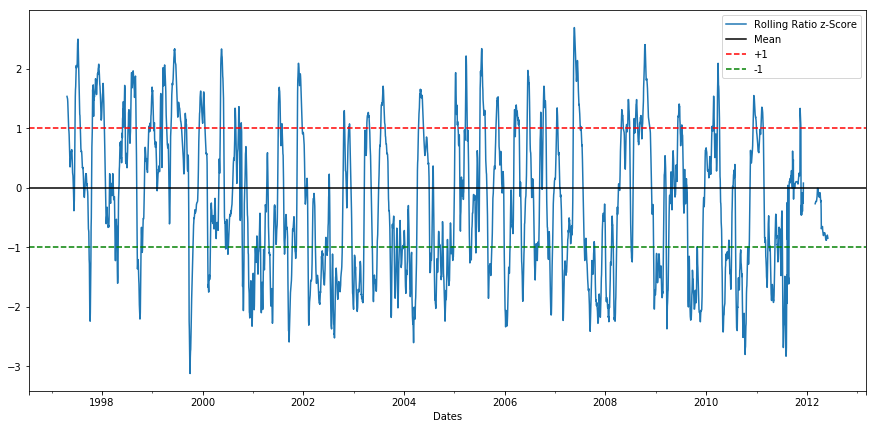

In [26]:
plt.figure(figsize=(15,7))
zscore_60_5.plot()
plt.axhline(0, color='black')
plt.axhline(1.0, color='red', linestyle='--')
plt.axhline(-1.0, color='green', linestyle='--')
plt.legend(['Rolling Ratio z-Score', 'Mean', '+1', '-1'])
plt.show()

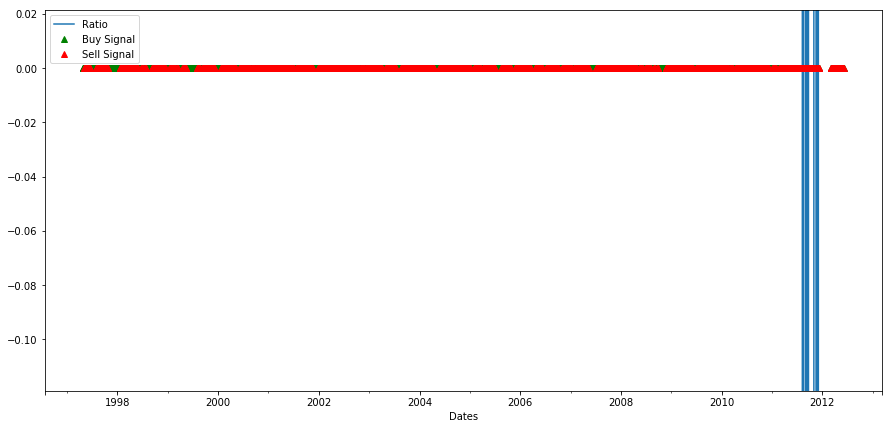

In [159]:
# Plot the ratios and buy and sell signals from z score
plt.figure(figsize=(15,7))

train[60:].plot()

buy = train.copy()
sell = train.copy()

buy[zscore_60_5>-1] = 0
sell[zscore_60_5<1] = 0

buy[60:].plot(color='g', linestyle='None', marker='^')
sell[60:].plot(color='r', linestyle='None', marker='^')

x1,x2,y1,y2 = plt.axis()
plt.axis((x1,x2,ratios.min(),ratios.max()))
plt.legend(['Ratio', 'Buy Signal', 'Sell Signal'])
plt.show()

In [160]:
# Plot the prices and buy and sell signals from z score

S1 = df_filtered['GOLDS'].iloc[:round(0.7*length)]
S2 = df_filtered['GTII10'].iloc[:round(0.7*length)]

buy_gold = np.nan*S1.copy()
sell_gold = np.nan*S1.copy()

buy_rates = np.nan*S2.copy()
sell_rates = np.nan*S2.copy()

#Buy/sell Gold
buy_gold[buy!=0] = S1[buy!=0]
sell_gold[sell!=0] = S1[sell!=0]

#Buy/sell Rates
buy_rates[sell!=0] = S2[sell!=0]
sell_rates[buy!=0] = S2[buy!=0]

fig = plt.figure(figsize=(18,9))

ax1 = fig.add_subplot(111)
ax1.plot(S1[60:], 'b')
ax1.plot(buy_gold[60:], color='g', linestyle='None', marker='^')
ax1.plot(sell_gold[60:], color='r', linestyle='None', marker='^')
ax1.set_ylabel('Gold')

ax2 = ax1.twinx()
ax2.plot(S2[60:], 'r')
ax2.plot(buy_rates[60:], color='g', linestyle='None', marker='^')
ax2.plot(sell_rates[60:], color='r', linestyle='None', marker='^')
ax2.set_ylabel('GTII10')

h1, l1 = ax1.get_legend_handles_labels()
h2, l2 = ax2.get_legend_handles_labels()

plt.legend(h1+h2, l1+l2, loc=2) 
plt.show()

IndexingError: Unalignable boolean Series provided as indexer (index of the boolean Series and of the indexed object do not match